In [636]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Collection

In [637]:
import os
import kagglehub

path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
csv = os.path.join(path, "diabetes.csv")
print("Path to dataset files:", path)

df = pd.read_csv(csv)

Using Colab cache for faster access to the 'pima-indians-diabetes-database' dataset.
Path to dataset files: /kaggle/input/pima-indians-diabetes-database


# EDA

In [638]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [639]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [640]:
df.shape

(768, 9)

In [641]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [642]:
missing_values = df.isnull().sum()
missing_values

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [643]:
total_cells = np.prod(df.shape)
total_missing_values = missing_values.sum()

percent_missing = total_missing_values/total_cells * 100
print("Total samples with missing values percent: ", percent_missing)

Total samples with missing values percent:  0.0


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

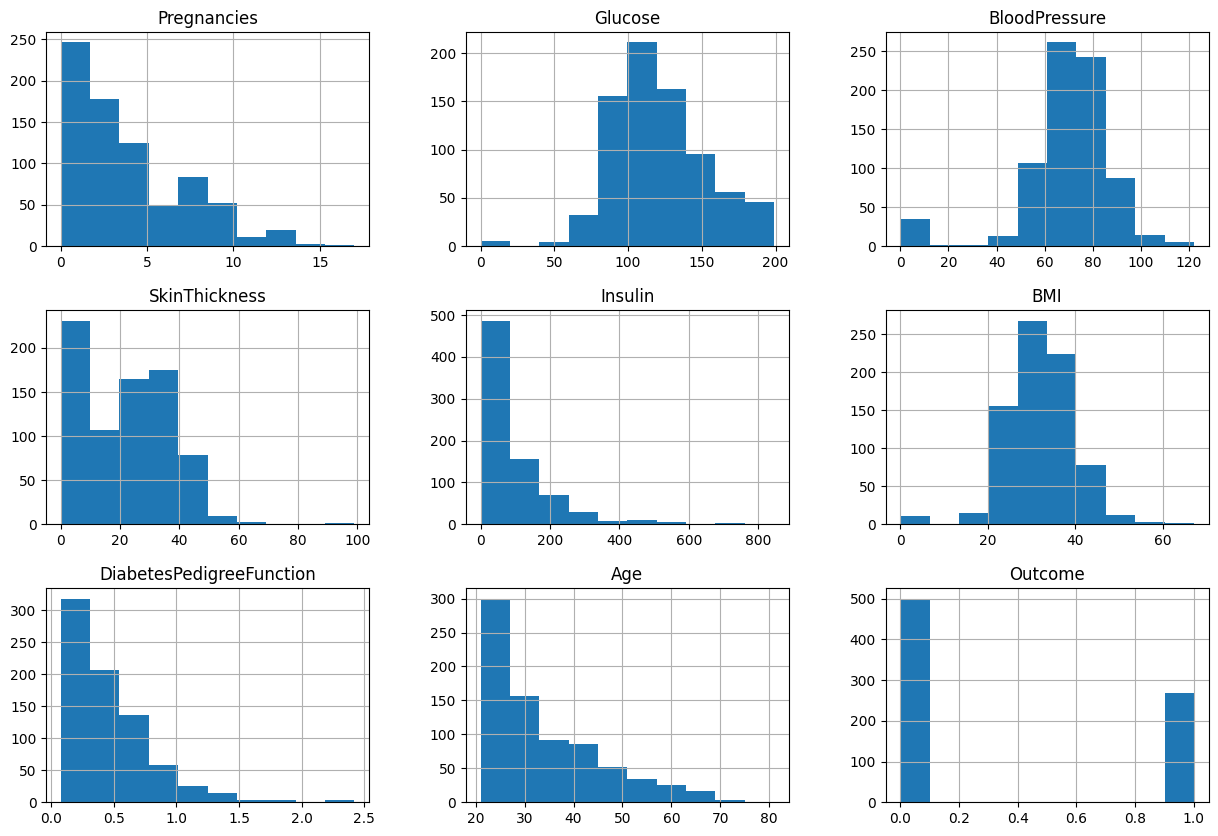

In [644]:
df.hist(figsize=(15,10))

In [645]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


<Axes: >

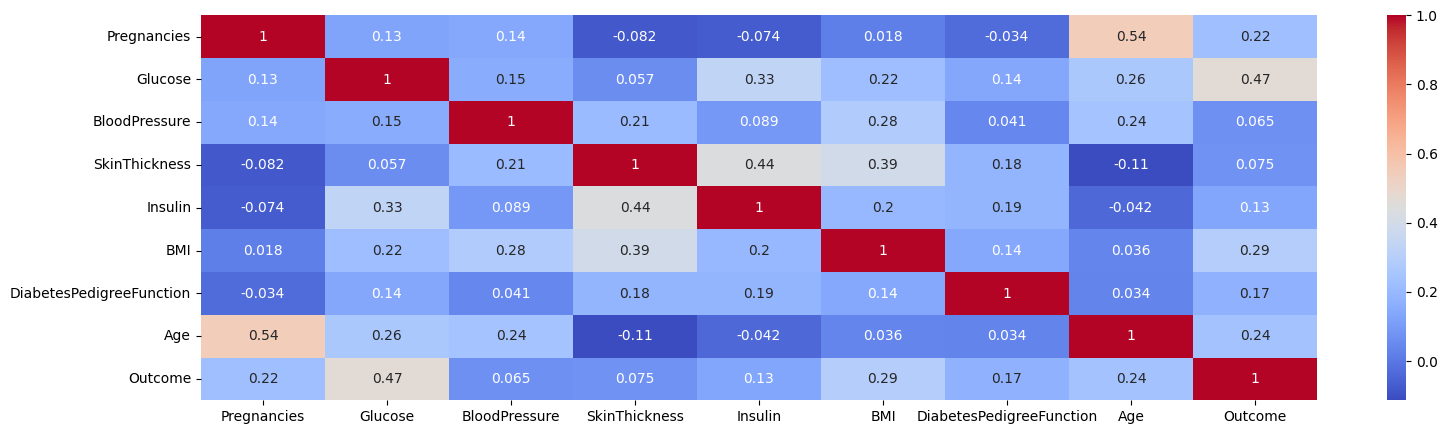

In [646]:
plt.figure(figsize=(18,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

<Axes: xlabel='Pregnancies'>

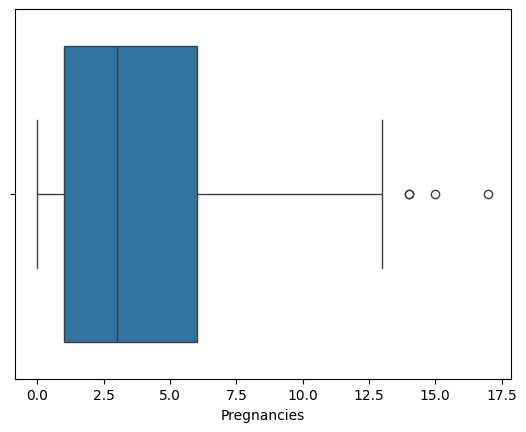

In [647]:
sns.boxplot(x=df['Pregnancies'])

<Axes: xlabel='Glucose'>

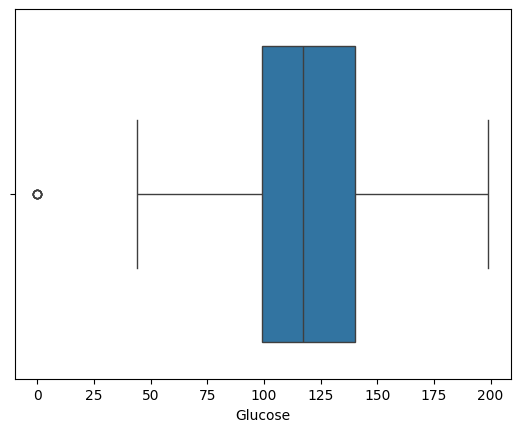

In [648]:
sns.boxplot(x=df['Glucose'])

<Axes: xlabel='BloodPressure'>

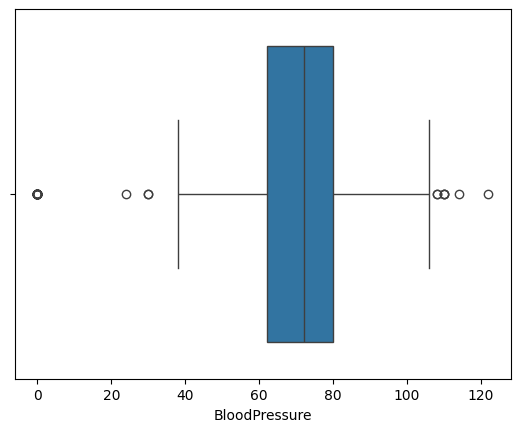

In [649]:
sns.boxplot(x=df['BloodPressure'])

<Axes: xlabel='SkinThickness'>

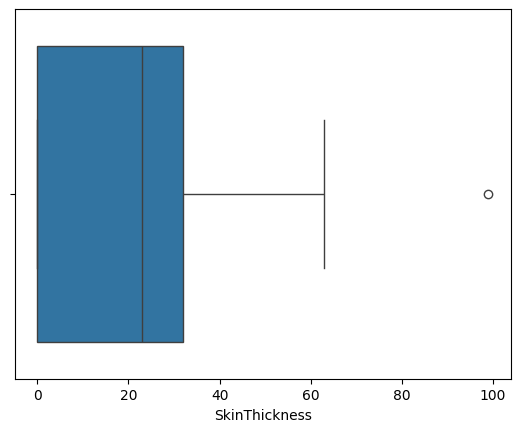

In [650]:
sns.boxplot(x=df['SkinThickness'])

<Axes: xlabel='Insulin'>

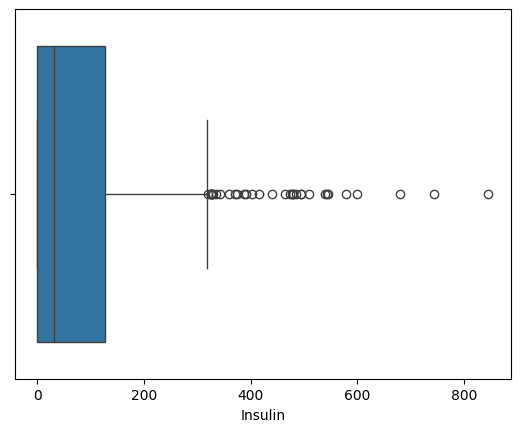

In [651]:
sns.boxplot(x=df['Insulin'])

<Axes: xlabel='BMI'>

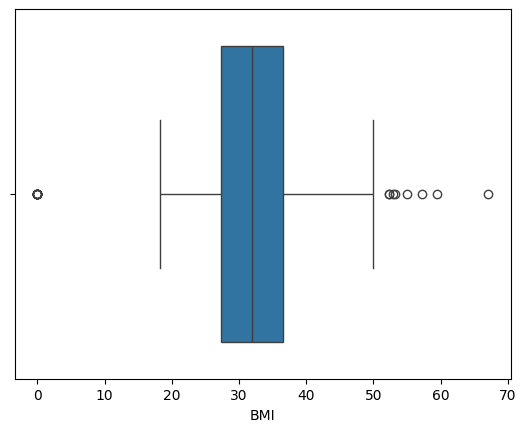

In [652]:
sns.boxplot(x=df['BMI'])

<Axes: xlabel='DiabetesPedigreeFunction'>

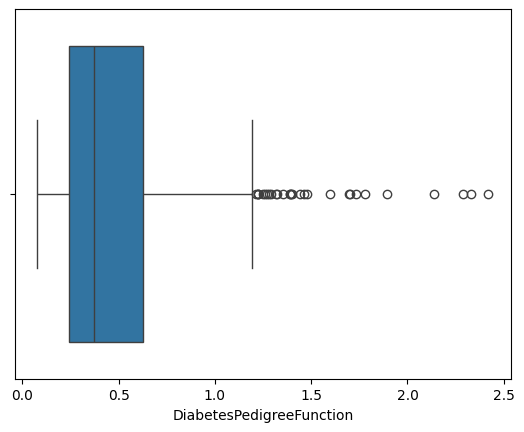

In [653]:
sns.boxplot(x=df['DiabetesPedigreeFunction'])

<Axes: xlabel='Age'>

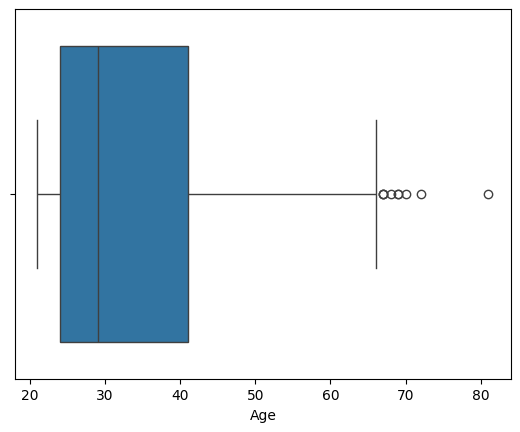

In [654]:
sns.boxplot(x=df['Age'])

# Data Preprocessing

## Data cleaning

In [655]:
print("Shape before removing duplicates:", df.shape)
df.drop_duplicates(inplace=True)
print("Shape after removing duplicates:", df.shape)

Shape before removing duplicates: (768, 9)
Shape after removing duplicates: (768, 9)


In [656]:
df.describe([x*0.1 for x in range(10)])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
0%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
10%,0.000000,85.000000,54.000000,0.000000,0.000000,23.600000,0.165000,22.000000,0.000000
20%,1.000000,95.000000,60.000000,0.000000,0.000000,25.900000,0.219400,23.000000,0.000000
30%,1.000000,102.000000,64.000000,8.200000,0.000000,28.200000,0.259000,25.000000,0.000000
40%,2.000000,109.000000,68.000000,18.000000,0.000000,30.100000,0.302800,27.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000


In [657]:
df = df[df['Glucose'] > 0]
df = df[df['BMI'] > 0]

<Axes: xlabel='Glucose'>

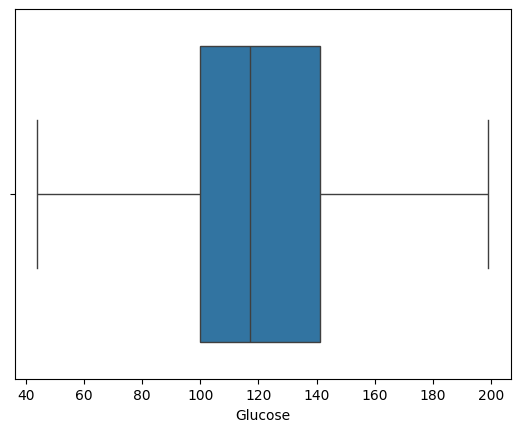

In [658]:
sns.boxplot(x=df['Glucose'])

<Axes: xlabel='BMI'>

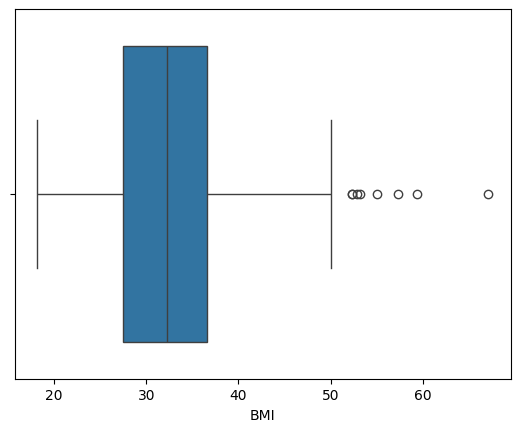

In [659]:
sns.boxplot(x=df['BMI'])

Dropping 'SkinThickness' and 'BloodPressure' as they have weak correlate score with target variable

In [660]:
df.drop(columns=['SkinThickness', 'BloodPressure'], inplace=True)

## Feature Engineering

In [661]:
df['Glucose_BMI'] = df['Glucose'] * df['BMI']
df['Age_Pregnancies'] = df['Age'] * df['Pregnancies']
df['Glucose_Age'] = df['Glucose'] * df['Age']

# Data Splitting

In [662]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [663]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [664]:
y_train.value_counts()

,count
Outcome,
0,397
1,204


In [665]:
y_test.value_counts()

,count
Outcome,
0,91
1,60


## Normalize

In [666]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_features = X_train.select_dtypes(include=np.number).columns

preprocessor = ColumnTransformer([('num', StandardScaler(), num_features)])

# Model Selection and Training

In [667]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(random_state=42, class_weight='balanced'))
])

## Hyperparameter Tuning

In [668]:
param_grid = {
    'model__penalty': ['l1', 'l2'],
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__solver': ['saga', 'liblinear'],
    'model__max_iter': [100, 200, 300, 500, 1000]
}

In [669]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

gscv = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=StratifiedKFold(10),
    scoring='roc_auc_ovr',
    n_jobs=-1
)

gscv.fit(X_train, y_train)

print("Best parameters found: ", gscv.best_params_)
print("Best cross-validation score: ", gscv.best_score_)

Best parameters found:  {'model__C': 10, 'model__max_iter': 100, 'model__penalty': 'l1', 'model__solver': 'saga'}
Best cross-validation score:  0.8342632783882783


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# Evaluation

In [670]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = gscv.predict(X_test)
y_pred_proba = gscv.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

Model Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        91
           1       0.66      0.82      0.73        60

    accuracy                           0.76       151
   macro avg       0.76      0.77      0.76       151
weighted avg       0.78      0.76      0.76       151

ROC-AUC: 0.8692307692307693
